In [1]:
import numpy as np
import pandas as pd

from util_io import (
    init, finalize, dump_conf, assigned_day_to_family_on_day, assigned_day_to_occupancy
)
from util_cost import (
    cal_total, n_people, family_id_choice_to_pref_cost, cal_total_preference, cal_total_accounting,
    nd_ndp1_to_account_penality
)
from util_cost import choices as family_pref
from util_check import deep_check

In [38]:
# constants #
N_families = 5000
N_days = 100
N_min_people = 125
N_max_people = 300
# constants #

# params #
path_init_conf = '../input/another_pytorch_implementation.csv'
#path_init_conf = '../output/m08-improved.csv'

In [39]:
assigned_day, family_on_day, occupancy = init(path_conf=path_init_conf)
print('Init config:')
try:
    is_valid = deep_check(assigned_day, family_on_day, occupancy)
except:
    is_valid = False
print('Valid solution:', is_valid)
print('Total score:    ', cal_total(assigned_day, occupancy))
print('Preference cost:', cal_total_preference(assigned_day))
print('Accounting cost:', cal_total_accounting(occupancy))

Read initial configs...
Read config completed.
Init config:
deep check: everything looks fine.
Valid solution: True
Total score:     71252.41958450396
Preference cost: 65785
Accounting cost: 5467.419584503968


In [40]:
def assigned_day_to_pref_rank(assigned_day):
    pref_index_matrix = assigned_day.reshape(-1, 1) == family_pref
    family_in_pref = pref_index_matrix.max(axis=1)
    return (pref_index_matrix).argmax(axis=1) * family_in_pref + (~family_in_pref) * 10

In [41]:
family_pref_rank = assigned_day_to_pref_rank(assigned_day)

In [42]:
import matplotlib.pyplot as plt

In [43]:
df_family_pref_rank = pd.DataFrame(family_pref_rank, columns=['rank'])

In [44]:
df_family_pref_rank['rank'].value_counts()

0    3960
1     791
2     207
3      39
4       3
Name: rank, dtype: int64

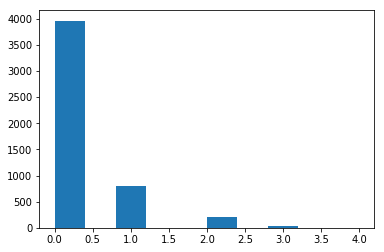

In [45]:
plt.hist(family_pref_rank)
plt.show()

In [46]:
(assigned_day == family_pref[:, 0]).sum()

3960

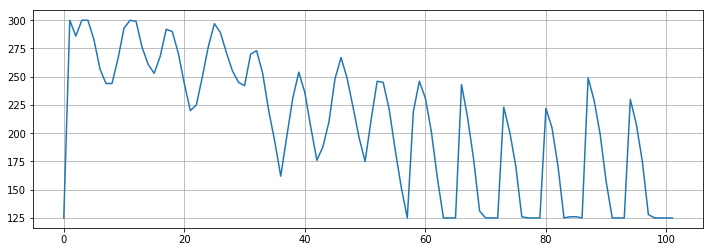

In [47]:
plt.figure(figsize=(12, 4))
plt.plot(occupancy)
plt.grid()
plt.show()

In [49]:
nd_ndp1_to_account_penality[300, 125]

3543750000.0

In [50]:
nd_ndp1_to_account_penality < 70000

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])